# Table of Contents

- [Assignment](#Assignment)
- [Data Exploration and Processing](#Data-Exploration-and-Processing)
- [Multicollinearity Check](#Multicollinearity-Check)
- [Train/Val/Test Split](#TrainValTest-Split)
- [Classical Machine Learning](#Classical-Machine-Learning)
- [Voting Regressor](#Voting-Regressor)
- [Deep Learning](#Deep-Learning)
- [Feature Selection](#Feature-Selection)



## Assignment


The  task is to define and train a machine learning model for predicting the price of a laptop (buynow_price column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the RMSE measure.

## Data Exploration and Processing


In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# read datasets as intsructed
train_df = pd.read_json("./train_dataset.json", orient="columns")
test_df = pd.read_json("./test_dataset.json", orient="columns")
val_df = pd.read_json("./val_dataset.json", orient="columns")

df = pd.concat([train_df, val_df, test_df], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [3]:
df.dtypes


graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [4]:
df.shape


(7853, 17)

In [5]:
# Look at unique values of each column, except the ones formatted as list
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")

unique values of graphic card type are:  ['dedicated graphics' None 'integrated graphics']
-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
-----------------------------------------------------
unique values of drive type are:  ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
-----------------------------------------------------
unique values of RAM type are:  ['ddr4' 'ddr3' None 'ddr3l']
-----------------------------------------------------
unique values of CPU 

In [6]:
#  state only takes one value  
# drop this column since it won't effect the price
df = df.drop(columns=['state'])
df = df.dropna()

In [7]:
# columns of communications, input_devices and multimedia include multiple values in a cell in list format
# not possible to represent them in numerics in its current format
# split the values of these columns into different columns
compact_cols = ['communications', 'input devices', 'multimedia']

In [8]:
# use to_list( ) function to split lists into columns
# example of to_list( ) function of pandas
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


In [9]:
# get unique values of each features in our predefined lists 
# and convert them to new feature names

def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

In [10]:
compact_dict = {col: [] for  col in compact_cols}

# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)

In [11]:
compact_dict


{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [12]:
# transform string value to integer by excluding gb and mb
df['RAM size'] = df['RAM size'].str.replace(' gb','',regex=True)

# when regex=False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256',regex=False)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [13]:
# screen size column is given as intervals. 
# convert it as integers such as so 11.9" and less would become 11
df['screen size'] = df['screen size'].apply(lambda x: int(str(x)[:2]))
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


In [14]:
# split resolution (px) column into two columns of integers (resolution_x and resolution_y)
# as 1280 x 800 would have 1280 in the first column and 800 in the second column 
df['resolution_x'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [15]:
# resolution (px) is divided into resolution_x and resolution_y 
# drop resolution (px) 
df = df.drop(columns=['resolution (px)'])

In [16]:
df.dtypes


graphic card type          object
communications             object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                 int64
buynow_price              float64
resolution_x                int64
resolution_y                int64
dtype: object

In [17]:
# put all numerical columns together
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0
...,...,...,...,...,...,...,...
9211,4.0,32.0,2.8,500.0,15.0,1920.0,1080.0
2748,4.0,8.0,2.2,1000.0,17.0,1600.0,900.0
2072,4.0,8.0,2.6,1120.0,17.0,1920.0,1080.0
4741,4.0,12.0,2.8,1256.0,15.0,1920.0,1080.0


In [18]:
# use get_dummies( ) from pandas library to convert operating system column as categories
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,0


In [19]:
# apply same logic to other suitable variables
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
    
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [21]:
# encode them
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,True,False,True,False
5845,True,False,False,True
5897,False,True,True,False
4870,False,True,True,False
2498,True,False,True,False
...,...,...,...,...
9211,True,False,True,False
2748,True,False,False,True
2072,True,False,True,False
4741,True,False,True,False


In [22]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df 

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [24]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,True,False,True,False,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,True,False,False,True,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,False,True,True,False,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,False,True,True,False,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,True,False,True,False,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
new_df.columns

Index(['graphic card type_dedicated graphics',
       'graphic card type_integrated graphics', 'warranty_producer warranty',
       'warranty_seller warranty', 'CPU cores', 'RAM size',
       'CPU clock speed (GHz)', 'drive memory size (GB)', 'screen size',
       'resolution_x', 'resolution_y', 'bluetooth', 'wi-fi',
       'wi-fi 802.11 b/g/n/ac', 'lan 10/100 mbps', 'wi-fi 802.11 a/b/g/n/ac',
       'nfc (near field communication)', 'lan 10/100/1000 mbps', 'gps',
       'wi-fi 802.11 b/g/n', 'intel wireless display (widi)',
       'wi-fi 802.11 a/b/g/n', 'modem 3g (wwan)', 'modem 4g (lte)', 'keyboard',
       'touchpad', 'illuminated keyboard', 'numeric keyboard',
       'SD card reader', 'camera', 'microphone', 'speakers', 'no system',
       'other', 'windows 10 home', 'windows 10 professional',
       'windows 7 home 64-bit', 'windows 7 professional 32-bit',
       'windows 7 professional 64-bit', 'windows 8.1 home 32-bit',
       'windows 8.1 home 64-bit', 'windows 8.1 professiona

# Multicollinearity Check


Multicollinearity is a potential problem for this regression task. We will check it through Variance Inflation Factor (VIF). We will eliminate all features that have VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [26]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure only numeric columns are used
numeric_df = new_df.select_dtypes(include=[np.number]).dropna()

# Compute VIF score
def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df.values, i) 
        for i in range(df.shape[1])
    ]
    return vif_data.sort_values(by="VIF").reset_index(drop=True)

# Apply VIF computation
vif_data = compute_vif(numeric_df)
print(vif_data)


/Users/deliorincon/Desktop/data-science-portfolio-copy/laptop-price-prediction/.venv-1/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            feature       VIF
0             windows 7 home 64-bit  1.027750
1   windows 8.1 professional 32-bit  1.031814
2     windows 7 professional 32-bit  1.034460
3              wi-fi 802.11 a/b/g/n  1.069641
4           wi-fi 802.11 a/b/g/n/ac  1.120634
..                              ...       ...
59                           hybrid       inf
60                              hdd       inf
61                             emmc       inf
62                           amd a6       inf
63                        other CPU       inf

[64 rows x 2 columns]


In [28]:
multicollinearity = True

# Start with numeric-only features
features = numeric_df.columns.tolist()
vif_data = compute_vif(numeric_df[features])

while multicollinearity:
    highest_vif_feature = vif_data.iloc[-1]['feature']  # last row after sorting
    print("I will remove", highest_vif_feature)
    
    # Remove from feature list
    features.remove(highest_vif_feature)
    
    # Recompute VIF
    vif_data = compute_vif(numeric_df[features])
    
    # Check if all VIFs are <= 20
    multicollinearity = vif_data['VIF'].max() > 20

selected_features = features
print("\nFinal selected features:", selected_features)
print(vif_data)


/Users/deliorincon/Desktop/data-science-portfolio-copy/laptop-price-prediction/.venv-1/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


I will remove other CPU


/Users/deliorincon/Desktop/data-science-portfolio-copy/laptop-price-prediction/.venv-1/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


I will remove hdd
I will remove ddr4
I will remove resolution_x
I will remove touchpad
I will remove screen size
I will remove camera
I will remove CPU clock speed (GHz)
I will remove windows 10 home
I will remove intel core i7
I will remove keyboard
I will remove bluetooth
I will remove CPU cores
I will remove resolution_y

Final selected features: ['RAM size', 'drive memory size (GB)', 'wi-fi', 'wi-fi 802.11 b/g/n/ac', 'lan 10/100 mbps', 'wi-fi 802.11 a/b/g/n/ac', 'nfc (near field communication)', 'lan 10/100/1000 mbps', 'gps', 'wi-fi 802.11 b/g/n', 'intel wireless display (widi)', 'wi-fi 802.11 a/b/g/n', 'modem 3g (wwan)', 'modem 4g (lte)', 'illuminated keyboard', 'numeric keyboard', 'SD card reader', 'microphone', 'speakers', 'no system', 'other', 'windows 10 professional', 'windows 7 home 64-bit', 'windows 7 professional 32-bit', 'windows 7 professional 64-bit', 'windows 8.1 home 32-bit', 'windows 8.1 home 64-bit', 'windows 8.1 professional 32-bit', 'windows 8.1 professional 64-bi

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

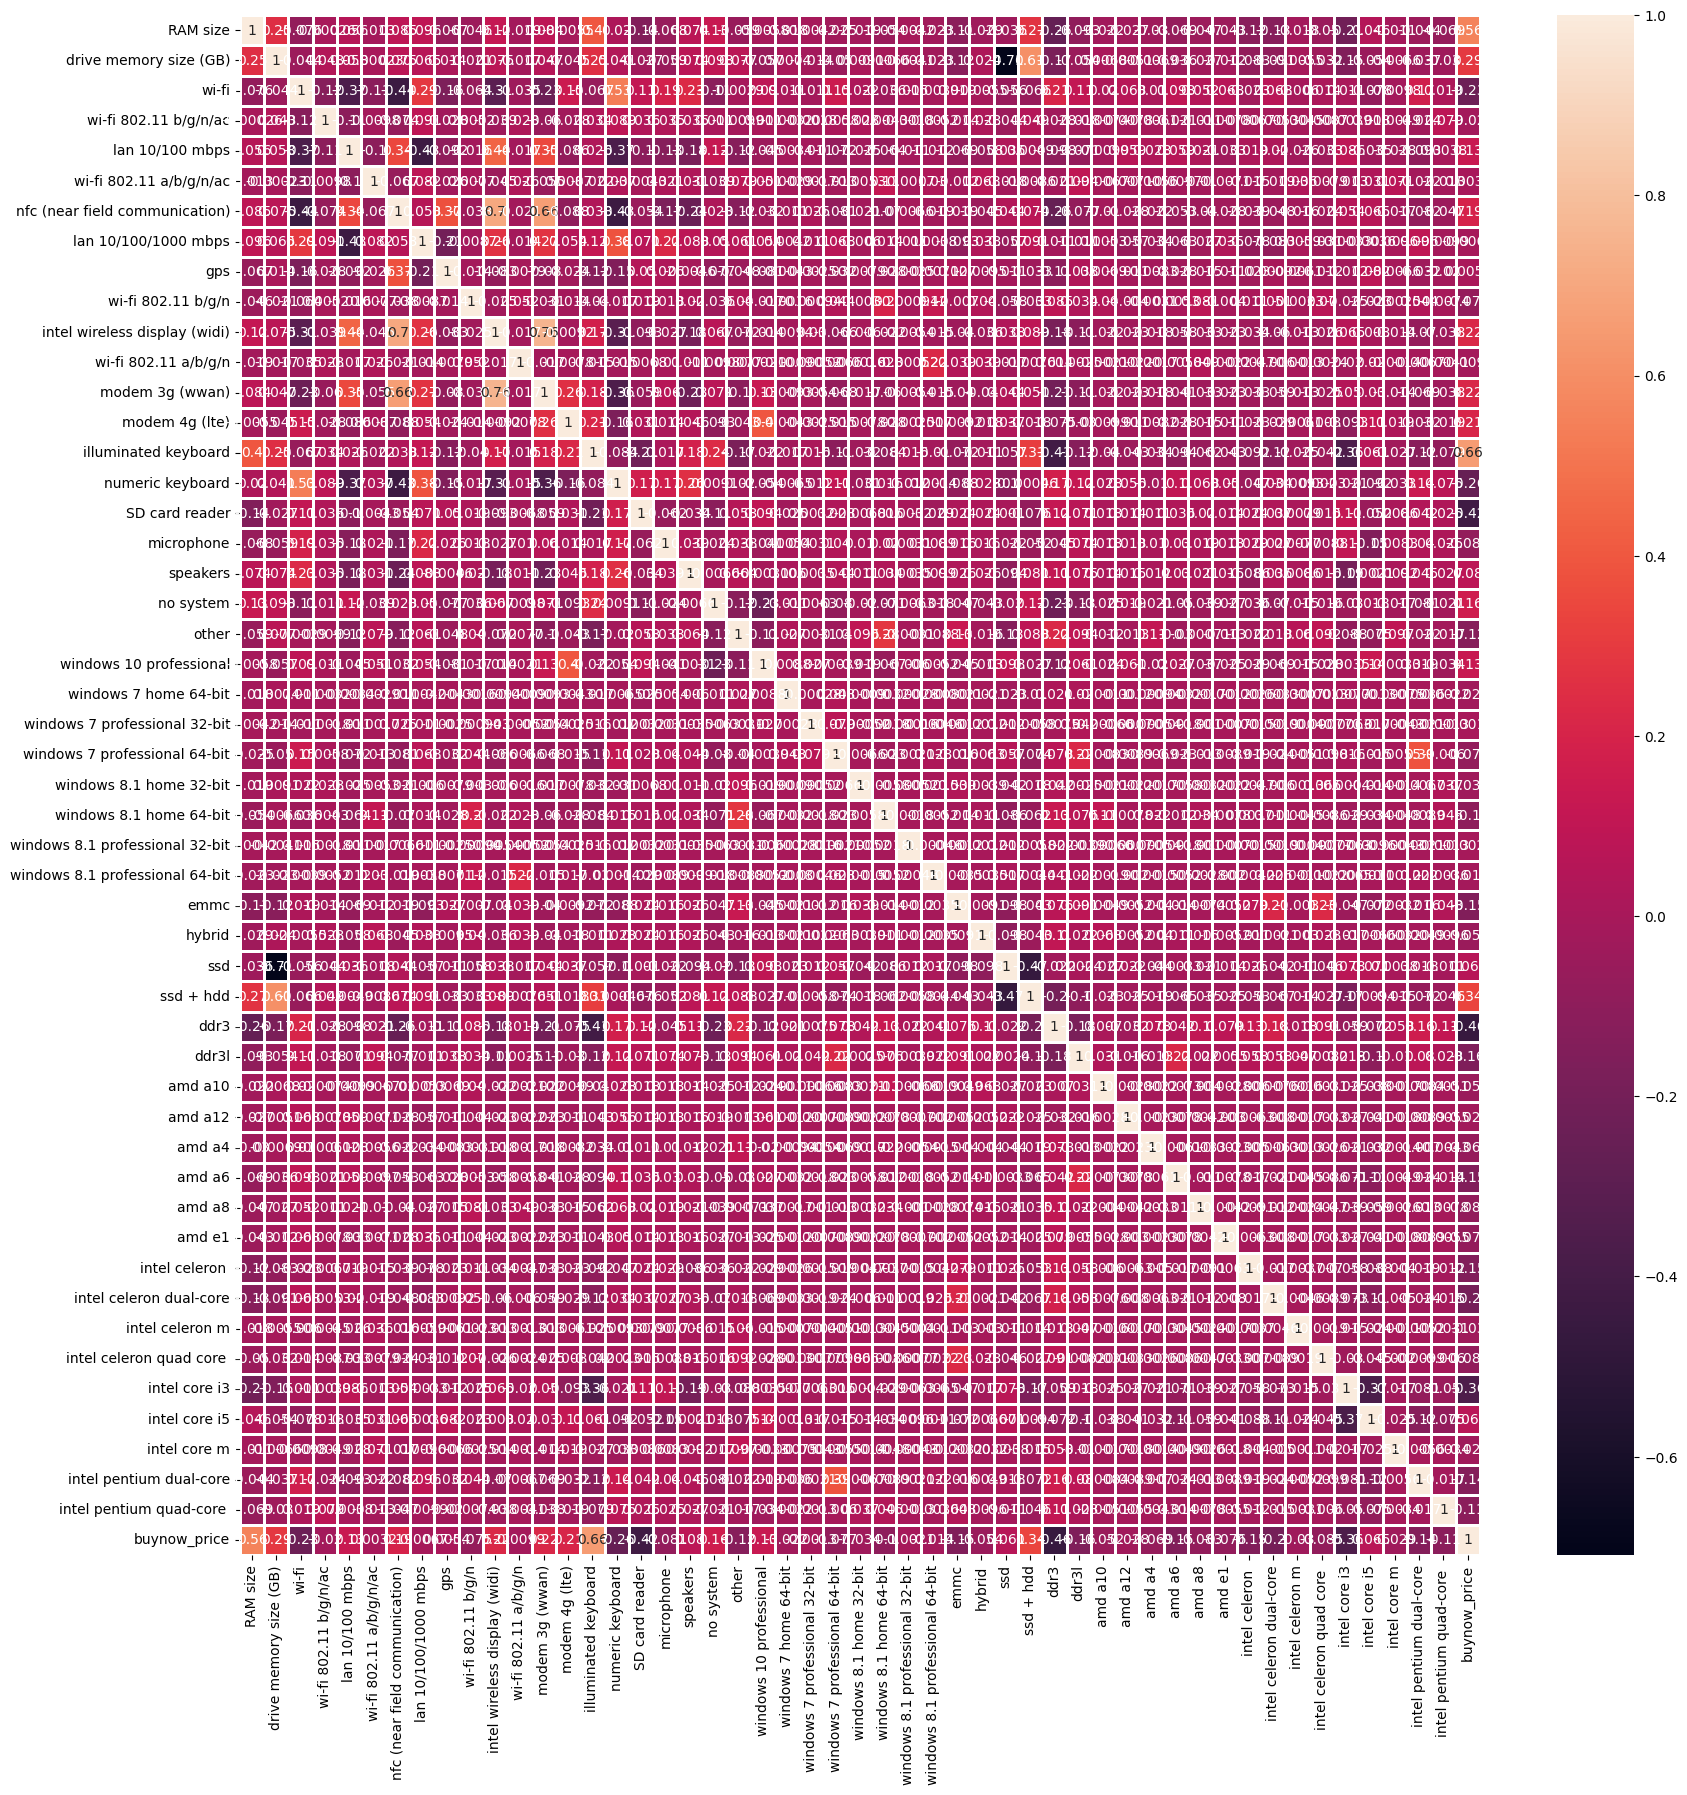

In [30]:
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

# Train/Val/Test Split

In [31]:
# use the indeces of given datasets to properly separate it again as initial datasets
train_indeces = train_df.dropna().index
val_indeces = val_df.dropna().index
test_indeces = test_df.dropna().index

In [32]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

In [33]:
# sklearn machine learning models expect y_train, y_test, y_val 
# in the shape as (row_number, ) instead of (row_number, 1) shape, so apply .ravel()
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()


In [34]:
X_train.shape


(3694, 50)

In [35]:
y_train.shape


(3694,)

## Classical Machine Learning


We will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with **MaxAbsScaler()** from sklearn, which works well with sparse datasets.

Linear : 794.4322090893725
MLP : 746.92297715262
DecisionTree : 734.0329230143562
RandomForest : 603.8155907935476
GradientBoosting : 593.9718059786027
ExtraTrees : 625.0595612402576


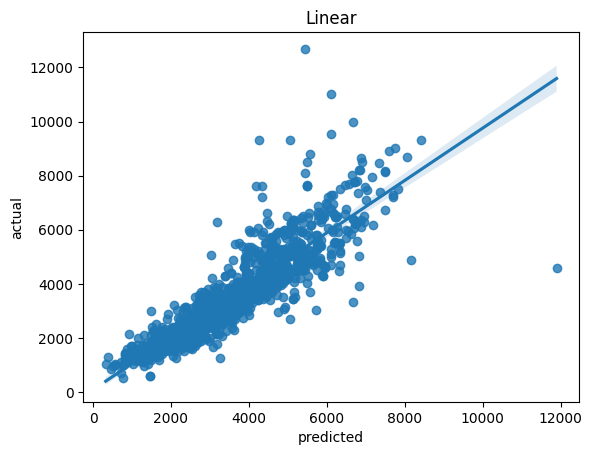

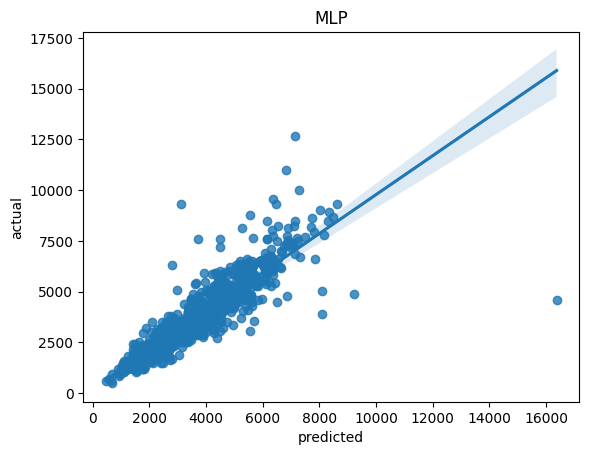

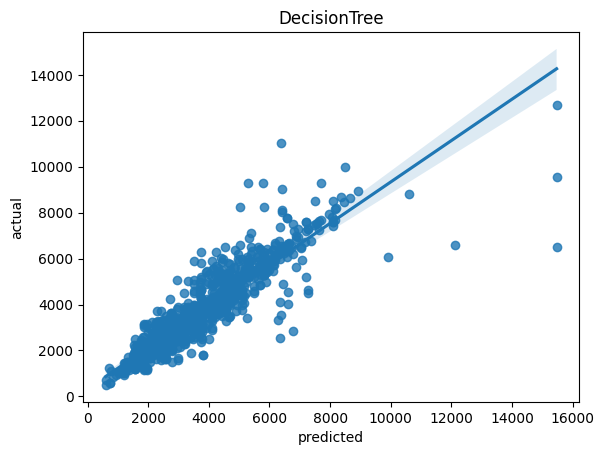

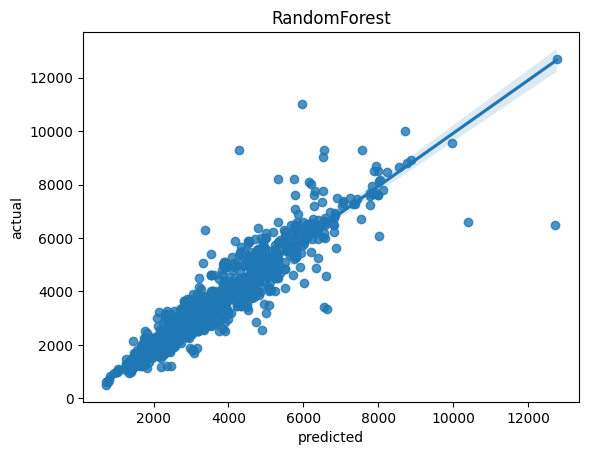

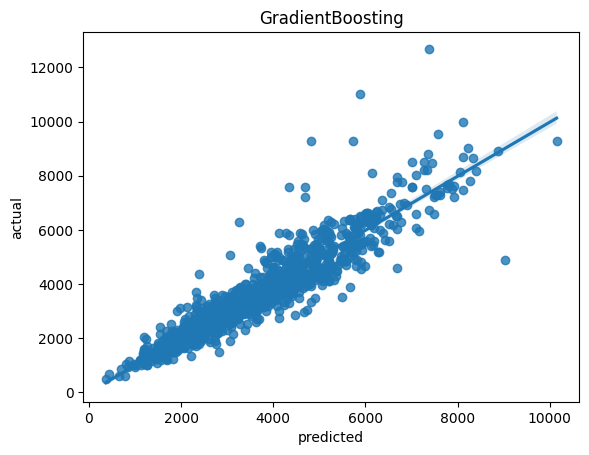

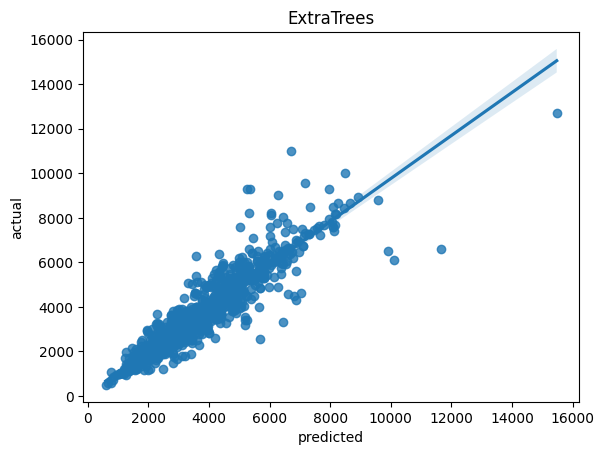

In [36]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# --- helper for RMSE ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))



def regression(regressor_name, regressor):
#     alternative scaler 
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train) 
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)
    
regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key])

### Voting Regressor

Voting : 541.4330893235032


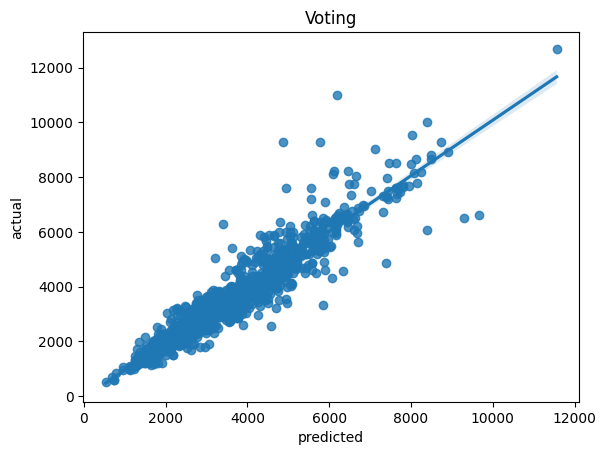

In [37]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# take the highest performed three models and combine them in a voting mechanism
# assign weights to their predictions and create new regressor
# it is possible to try with different weights 
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [38]:
pred_df


,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.00,2373.597020,2418.006008,2222.333333,2223.093810,2420.643428,2222.333333,2301.847490
1,2299.00,2454.518684,2289.514026,2484.815789,2367.396667,2220.247044,2384.000000,2314.347984
2,5999.00,5071.691823,5120.319199,4965.666667,5004.482143,5093.636196,4999.000000,5038.225014
3,1299.00,1023.199263,1201.724973,1249.000000,1250.719246,1224.296853,1249.000000,1239.548553
4,3329.00,6673.546897,4935.636654,6274.000000,6631.869444,4814.473279,6436.000000,5836.356673
...,...,...,...,...,...,...,...,...
1195,5599.00,5775.362437,5775.669376,5674.000000,5673.553571,6188.638075,5674.000000,5879.743623
1196,2925.36,3085.104468,2394.052162,2591.813200,2701.029150,2597.663560,2693.507500,2657.050336
1197,3799.00,4241.897667,4319.338133,4561.500000,4296.469333,4016.085136,4207.550000,4153.193888
1198,5589.00,5120.472392,5171.104314,4872.000000,4780.974667,5195.381640,4318.095000,4784.729572


It improves the performance of the RandomForest. We can go ahead with this voting model as our official solution.



## Deep Learning

Another promising regression algorithm is artificial neural networks. We will create a small one with 4 hidden units since we have small data. We will use a scheduler to decrease the learning rate after a certain epoch number. Also, to prevent overfitting, we will use EarlyStopping.



We will make a comparison between a complex model (two hidden layers) and a base model to see what works best.



In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)


# define the error metric using keras background
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    

# define base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

# define complex model architecture
def build_and_compile_complex_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

In [ ]:
# compile base model
dnn_model = build_and_compile_base_model()


In [ ]:
dnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 50)             │           101 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,630 (14.18 KB)

 Trainable params: 3,529 (13.79 KB)

 Non-trainable params: 101 (408.00 B)

In [ ]:
# --- SAFE TRAINING CELL (no keras.backend, no tf.math.pi) ---
import math
import tensorflow as tf

# ===== Metrics/Loss (TF-native) =====
@tf.function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

loss_fn = tf.keras.losses.MeanSquaredError()

# ===== Re-compile model =====
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"), rmse],
)

# ===== LR scheduler: must return a Python float =====
def scheduler(epoch, lr):
    # warmup first 5 epochs; then cosine-ish decay to 1e-5 by epoch 400
    if epoch < 5:
        return float(1e-3 if lr == 0.0 else lr)
    progress = (epoch - 5) / max(1, 400 - 5)  # 0 → 1 over training
    new_lr = 1e-5 + (1e-3 - 1e-5) * math.cos(progress * (math.pi / 2.0))
    return float(new_lr)

scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-6,
    patience=20,
    mode="min",
    restore_best_weights=True,
    verbose=1,
)

nan_killer = tf.keras.callbacks.TerminateOnNaN()

# ===== Train =====
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks=[scheduler_c, early_stopping, nan_killer],
    epochs=400,
    verbose=1,
)


Epoch 1/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14636831.0000 - mae: 3449.8074 - rmse: 3824.8760 - val_loss: 11861613.0000 - val_mae: 3054.4358 - val_rmse: 3477.7454 - learning_rate: 0.0010
Epoch 2/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9129282.0000 - mae: 2554.0681 - rmse: 3118.3904 - val_loss: 5834993.0000 - val_mae: 1947.0667 - val_rmse: 2650.0505 - learning_rate: 0.0010
Epoch 3/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5499101.0000 - mae: 1866.2181 - rmse: 2651.1504 - val_loss: 4932386.0000 - val_mae: 1811.5358 - val_rmse: 2581.5474 - learning_rate: 0.0010
Epoch 4/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5265378.0000 - mae: 1844.6382 - rmse: 2637.6389 - val_loss: 4889925.5000 - val_mae: 1807.6282 - val_rmse: 2581.5649 - learning_rate: 0.0010
Epoch 5/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5243120.0000 - mae: 1844.5054 - rmse: 2634.6726 - val_loss: 4833159.0000 - val_mae: 1793.9655 - val_rmse: 2568.3535 - learning_rate: 

Available keys: dict_keys(['loss', 'mae', 'rmse', 'val_loss', 'val_mae', 'val_rmse', 'learning_rate'])


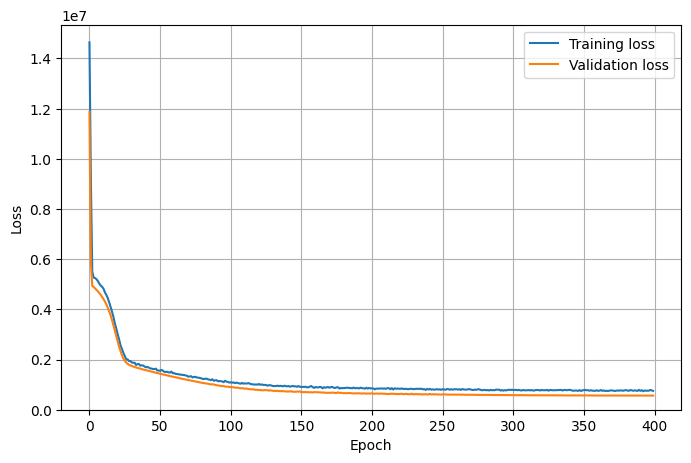

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Show available metrics
    print("Available keys:", history.history.keys())

    plt.figure(figsize=(8,5))
    plt.plot(history.history.get('loss', []), label='Training loss')
    plt.plot(history.history.get('val_loss', []), label='Validation loss')

    # Auto scale y-axis
    plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)


In [ ]:
# test model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 708018.2500 - mae: 569.9340 - rmse: 2238.2708 


[708018.25, 569.9339599609375, 2238.270751953125]

This result is slightly worse than the base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.

In [ ]:
# compile complex model
dnn_model = build_and_compile_complex_model()

In [ ]:
dnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 50)             │           101 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,966 (15.50 KB)

 Trainable params: 3,865 (15.10 KB)

 Non-trainable params: 101 (408.00 B)

In [ ]:
import tensorflow as tf
import math

# ✅ TF-native RMSE metric (no keras.backend)
@tf.function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# 
# If regression:
loss_fn = tf.keras.losses.MeanSquaredError()

# If classification (binary):
# loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# If classification (multi-class with sparse labels):
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# ✅ Re-compile model to drop legacy backend code
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=[rmse, tf.keras.metrics.MeanAbsoluteError(name="mae")]
)

# ✅ Scheduler (fixed, no tf.math.pi)
def scheduler(epoch, lr):
    if epoch < 5:
        return float(1e-3 if lr == 0.0 else lr)
    progress = (epoch - 5) / max(1, 50 - 5)
    return float(1e-5 + (1e-3 - 1e-5) * math.cos(progress * (math.pi / 2)))

scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-6,
    patience=20,
    mode="min",
    restore_best_weights=True,
    verbose=1,
)

# ✅ Train safely
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks=[scheduler_c, early_stopping],
    epochs=50,
    verbose=1
)


Available keys: dict_keys(['loss', 'mae', 'rmse', 'val_loss', 'val_mae', 'val_rmse', 'learning_rate'])


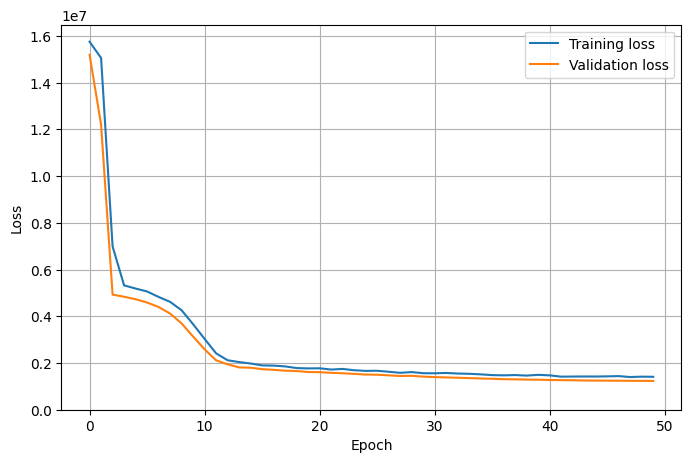

In [ ]:
plot_loss(history)


In [ ]:
# test complex model
dnn_model.evaluate(X_test, y_test, verbose=1)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1403516.0000 - mae: 808.6959 - rmse: 2143.5764


[1403516.0, 2143.576416015625, 808.6959228515625]

This result is slightly worse than the base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.

## Feature Selection


Feature selection hurts the performance of this task. However, it is always best to present all the methods applied through the assignment. Hence, we are representing it also. We used f_regression and RandomForestRegressor.modelimportances to check feature importance. We decided on k=15, but you can change and see the results for different k values.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k =25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X, y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['RAM size',
 'drive memory size (GB)',
 'wi-fi',
 'lan 10/100 mbps',
 'nfc (near field communication)',
 'intel wireless display (widi)',
 'modem 3g (wwan)',
 'modem 4g (lte)',
 'illuminated keyboard',
 'numeric keyboard',
 'SD card reader',
 'no system',
 'other',
 'windows 10 professional',
 'windows 8.1 home 64-bit',
 'emmc',
 'ssd + hdd',
 'ddr3',
 'ddr3l',
 'amd a6',
 'intel celeron ',
 'intel celeron dual-core',
 'intel core i3',
 'intel pentium dual-core',
 'intel pentium quad-core ']

In [ ]:
X_train, X_val, X_test = train_df[cols].to_numpy(), val_df[cols].to_numpy(), test_df[cols].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 737.0192618551669


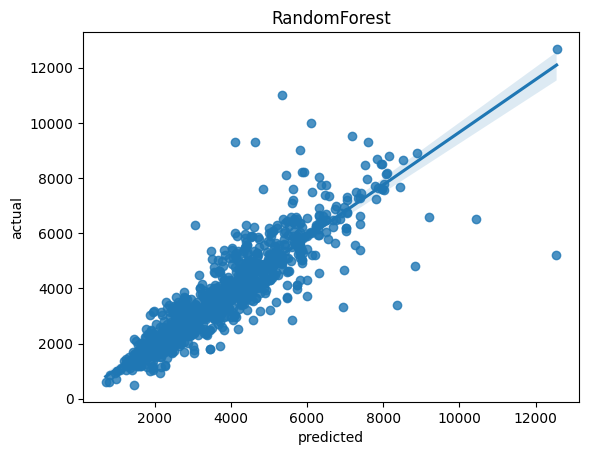

In [ ]:
regression('RandomForest', regressors['RandomForest'])


Feature: RAM size , Score: 0.11062491139181738
Feature: drive memory size (GB) , Score: 0.07015822766485834
Feature: wi-fi , Score: 0.011975934681348985
Feature: wi-fi 802.11 b/g/n/ac , Score: 0.0006819845367186596
Feature: lan 10/100 mbps , Score: 0.02700186777169223
Feature: wi-fi 802.11 a/b/g/n/ac , Score: 0.0012922505638695036
Feature: nfc (near field communication) , Score: 0.004353071779332729
Feature: lan 10/100/1000 mbps , Score: 0.009629377484451435
Feature: gps , Score: 0.002517354809642658
Feature: wi-fi 802.11 b/g/n , Score: 0.00030683230599048067
Feature: intel wireless display (widi) , Score: 0.009358632801445287
Feature: wi-fi 802.11 a/b/g/n , Score: 0.0004709431467711198
Feature: modem 3g (wwan) , Score: 0.004702933178009891
Feature: modem 4g (lte) , Score: 0.0051772574827464056
Feature: illuminated keyboard , Score: 0.41782478139401613
Feature: numeric keyboard , Score: 0.022421571351985293
Feature: SD card reader , Score: 0.12071025562308738
Feature: microphone , Scor

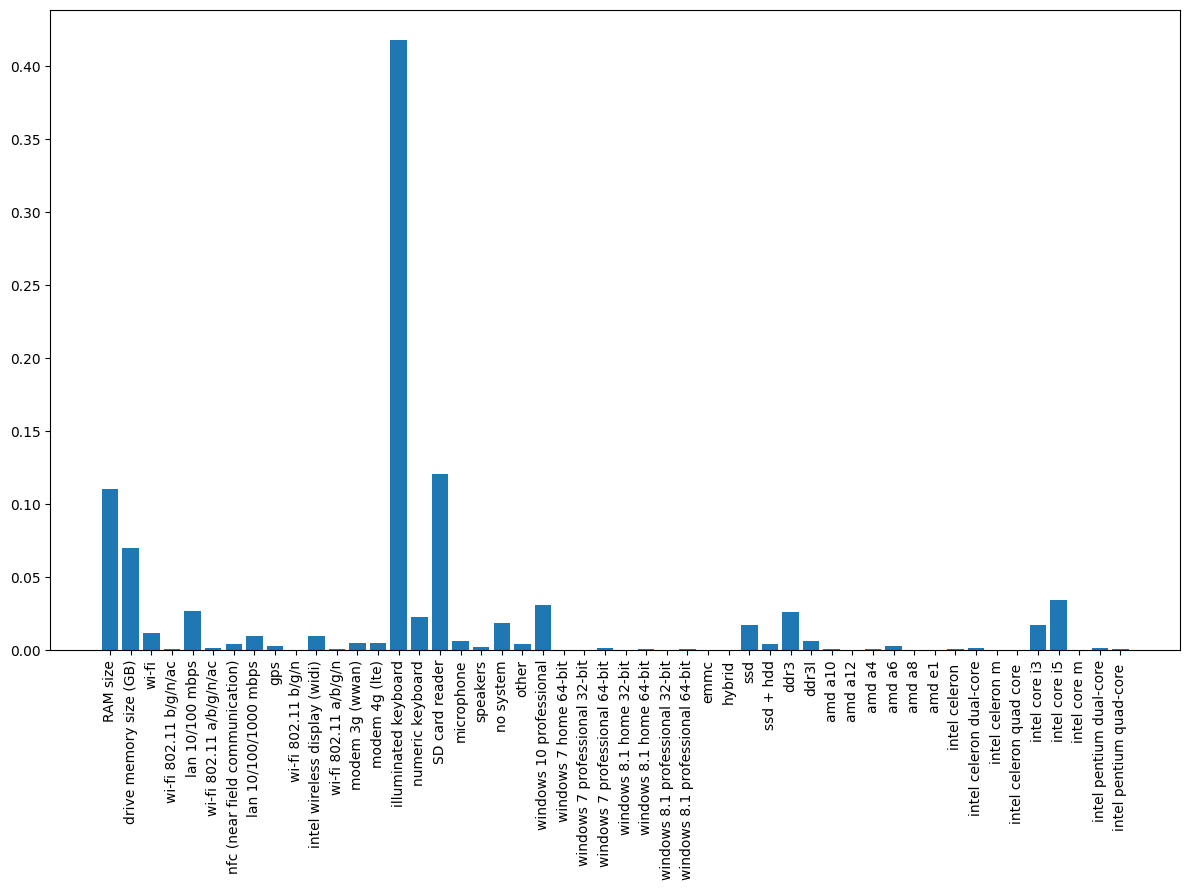

In [ ]:
X = new_df[selected_features].values
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()
model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {selected_features[i]} , Score: {v}")
# plot feature importance
plt.figure(figsize=(12, 9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['RAM size',
 'drive memory size (GB)',
 'lan 10/100 mbps',
 'illuminated keyboard',
 'numeric keyboard',
 'SD card reader',
 'windows 10 professional',
 'ddr3',
 'intel core i5']

Still, the complete feature set provides better results compared to features with the highest importance.

In [ ]:
X_train, X_val, X_test = train_df[feats_w_highest_importance].to_numpy(), val_df[feats_w_highest_importance].to_numpy(), test_df[feats_w_highest_importance].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()


RandomForest : 729.1253997507994


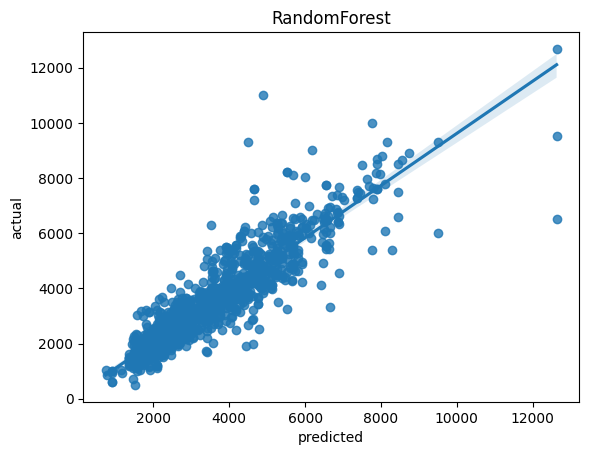

In [ ]:
regression('RandomForest', regressors['RandomForest'])

In [ ]:
# Show shape and first few rows of the final dataframe
print("Final dataframe shape:", new_df.shape)
display(new_df.head())

# Show the exact final feature columns
print("Final feature columns:")
print(list(new_df.columns))

# Double-check target is not inside
print("Target column in df?:", "buynow_price" in new_df.columns)

Final dataframe shape: (6109, 68)


,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,True,False,True,False,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,True,False,False,True,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,False,True,True,False,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,False,True,True,False,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,True,False,True,False,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


Final feature columns:
['graphic card type_dedicated graphics', 'graphic card type_integrated graphics', 'warranty_producer warranty', 'warranty_seller warranty', 'CPU cores', 'RAM size', 'CPU clock speed (GHz)', 'drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y', 'bluetooth', 'wi-fi', 'wi-fi 802.11 b/g/n/ac', 'lan 10/100 mbps', 'wi-fi 802.11 a/b/g/n/ac', 'nfc (near field communication)', 'lan 10/100/1000 mbps', 'gps', 'wi-fi 802.11 b/g/n', 'intel wireless display (widi)', 'wi-fi 802.11 a/b/g/n', 'modem 3g (wwan)', 'modem 4g (lte)', 'keyboard', 'touchpad', 'illuminated keyboard', 'numeric keyboard', 'SD card reader', 'camera', 'microphone', 'speakers', 'no system', 'other', 'windows 10 home', 'windows 10 professional', 'windows 7 home 64-bit', 'windows 7 professional 32-bit', 'windows 7 professional 64-bit', 'windows 8.1 home 32-bit', 'windows 8.1 home 64-bit', 'windows 8.1 professional 32-bit', 'windows 8.1 professional 64-bit', 'emmc', 'hdd', 'hybrid', 'ssd', 'ss

In [ ]:
import joblib, os
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# ===== Final Split (using your selected features) =====
X_train = train_df[feats_w_highest_importance]
X_val   = val_df[feats_w_highest_importance]
X_test  = test_df[feats_w_highest_importance]

y_train = df.loc[train_indeces][label_col].to_numpy().ravel()
y_val   = df.loc[val_indeces][label_col].to_numpy().ravel()
y_test  = df.loc[test_indeces][label_col].to_numpy().ravel()

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

# ===== Build VotingRegressor with your top 3 models =====
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

voting_reg = VotingRegressor(
    estimators=[("gb", reg1), ("et", reg2), ("rf", reg3)],
    weights=[0.4, 0.35, 0.25]  # adjust if needed
)

# ===== Pipeline (scaling + model) =====
pipe = make_pipeline(MaxAbsScaler(), voting_reg)

# Train on training data
pipe.fit(X_train, y_train)

# Evaluate on test
preds = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("✅ Final VotingRegressor RMSE:", rmse)

# ===== Save model + feature names =====
os.makedirs("models", exist_ok=True)
joblib.dump(
    {"pipeline": pipe, "feature_names": list(X_train.columns)},
    "models/laptop_price_pipeline.joblib"
)
print("💾 Model saved to → models/laptop_price_pipeline.joblib")

Shapes: (3694, 9) (1215, 9) (1200, 9)
✅ Final VotingRegressor RMSE: 690.6174090354605
💾 Model saved to → models/laptop_price_pipeline.joblib


In [ ]:
import joblib
bundle = joblib.load("models/laptop_price_pipeline.joblib")
print(bundle["feature_names"])

['RAM size', 'drive memory size (GB)', 'lan 10/100 mbps', 'illuminated keyboard', 'numeric keyboard', 'SD card reader', 'windows 10 professional', 'ddr3', 'intel core i5']
